In [1]:
from scipy.stats import wasserstein_distance

Counting Ollivier curvature is not that trivial:

try counting Oli(0, 1)
According to https://www.mas.ncl.ac.uk/graph-curvature/ it is -1/15
```
   3--2
   | /|
   |/ |
6--0--1
   |  |
   |  |
   4  5

```

In [2]:
wd = wasserstein_distance([0, 1/5, 1/5, 1/5, 1/5, 0, 0], [1/3, 0, 1/3, 0, 0, 1/3, 0])
print(1 - wd/1)

0.9142857142857143


Wrong!
Algoritm assumes all paths are equal in length

In [3]:
import ot

In [4]:
path_lens = [
    [0, 1, 1, 1, 1, 2, 1],
    [1, 0, 1, 2, 2, 1, 2], 
    [1, 1, 0, 1, 2, 2, 2],
    [1, 2, 1, 0, 2, 3, 2],
    [1, 2, 2, 2, 0, 3, 2],
    [2, 1, 2, 3, 3, 0, 3],
    [1, 2, 2, 2, 2, 3, 0]
]
wd = ot.emd2([0, 1/5, 1/5, 1/5, 1/5, 0, 1/5], [1/3, 0, 1/3, 0, 0, 1/3, 0], path_lens)

In [5]:
print(1 - wd/1)

-0.06666666666666665


Wow it worked

---

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [7]:
nx.__version__

'2.5'

In [8]:
def show_graph(gr, attr='weight'):
    pos = nx.drawing.layout.kamada_kawai_layout(gr)
    nx.draw(gr, pos, with_labels=True)
    elabels = nx.get_edge_attributes(gr, attr)
    # convert floats to a readable looking format
    elabels = {(v1, v2): str(round(val, 5)) for (v1, v2), val in elabels.items()} 
    nx.draw_networkx_edge_labels(gr, pos, 
                                 edge_labels=elabels)
    plt.show()

In [9]:
adj = [
    (0, 1), (0, 2), (0, 3), (0, 4), (0, 6),
    (1, 2), (1, 5), 
    (2, 3)
]

In [10]:
G = nx.Graph()
# G.add_nodes_from(range(7))
G.add_edges_from(adj)
for e in G.edges:
    G.edges[e]['weight'] = 1
for v in G.nodes:
    G.nodes[v]['weight'] = 1

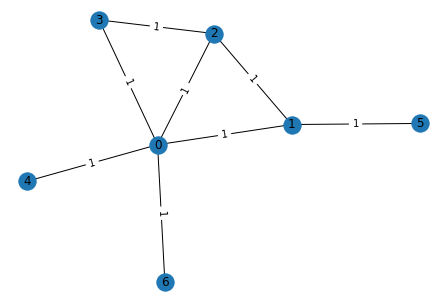

In [11]:
show_graph(G)

In [12]:
idleness = 0.3
floyd_warshall = nx.algorithms.shortest_paths.dense.floyd_warshall_numpy(G)

def create_mu(vertex, gr, idleness):
    neighborlist = list(gr.neighbors(vertex))
    spread = (1 - idleness) / len(neighborlist)
    mu = [spread if v in neighborlist else 0 for v in gr.nodes()]
    mu[vertex] = idleness
    return mu

for e in G.edges():
    v1, v2 = e
    mu1 = create_mu(v1, G, idleness)
    mu2 = create_mu(v2, G, idleness)
    wd = ot.emd2(mu1, mu2, floyd_warshall)
    G.edges[e]['ollivier'] = 1 - wd/G.edges[e]['weight']

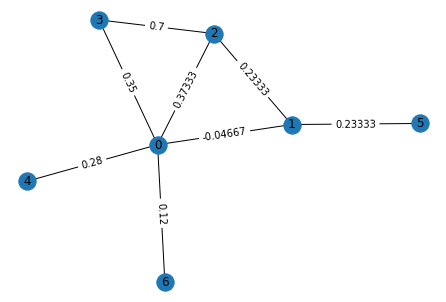

In [13]:
show_graph(G, 'ollivier')

Right!